#Cardiovascular Disease Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###Importing the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import random
from statistics import mean
from keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import keras
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, SGD

Reading the dataset:

In [ ]:
original_data=pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
original_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Let's observe the number of columns and the number of rows in the dataset:

In [ ]:
original_data.shape

(1025, 14)

In [ ]:
original_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Let's observe the columns present in the dataset:

In [ ]:
original_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The above column description:


*   age: Age of the individual in years

*   sex: Sex of the individual (0 = female, 1 = male)

*   cp: Chest Pain type-
        Value 0: This represents Typical Angina
        Value 1: This represents Atypical Angina
        Value 2: This represents Non-Anginal Pain
        Value 3: This represents Asymptomatic

*   trestbps: Blood Pressure at the resting state (in mm Hg on entering into the hospital)

*   chol: This shows Serum cholestoral in mg/dl

*   fbs: (Blood sugar at the fasting state > 120 mg/dl) (0 = False, 1 = True)

*   restecg: Results obtained from Resting electrocardiographic
             Value 0: This represents normal
             Value 1: This shows that the individual is having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
             Value 2: This shows a probable or definite left ventricular hypertrophy by Estes' criteria

*   thalach: This shows that the maximum rate of heart is achieved

*   exang: Angina induced through exercise (0 = No, 1 = yes)

*   oldpeak: ST Exercise induced ST depression relative to rest

*   slope: This shows the peak exercise ST segment's slope
           Value 0: This represents upsloping
           Value 1: This represents flat
           Value 2: This represents downsloping

*   ca: This represents the major vessel's(0-3) number which is coloured by flouroscopy

*   thal: 
          0 = This represents normal; 
          1 = This represents fixed defect; 
          2 = This represents reversable defect

*   target: 
            0: This represents there are no Cardiovascular Disease
            1: This represents there are Cardiovascular Disease















Observing the distribution of the target variables:

1    526
0    499
Name: target, dtype: int64


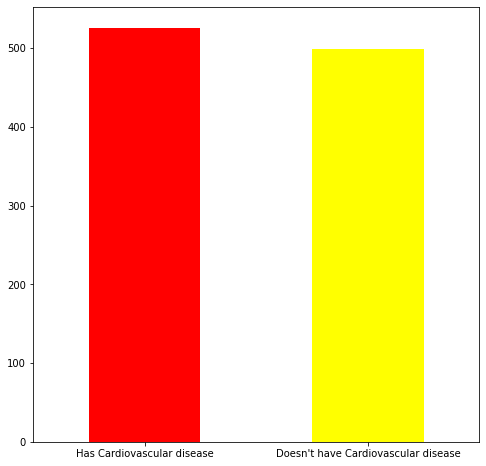

In [ ]:
print(original_data['target'].value_counts())
graph=original_data['target'].value_counts().plot(kind='bar',rot = 0,color=['red','yellow'], figsize=(8,8))
graph.set_xticklabels(labels=['Has Cardiovascular disease', "Doesn't have Cardiovascular disease"], rotation=0);


Fiding the correlation between each featres using the heatmap:

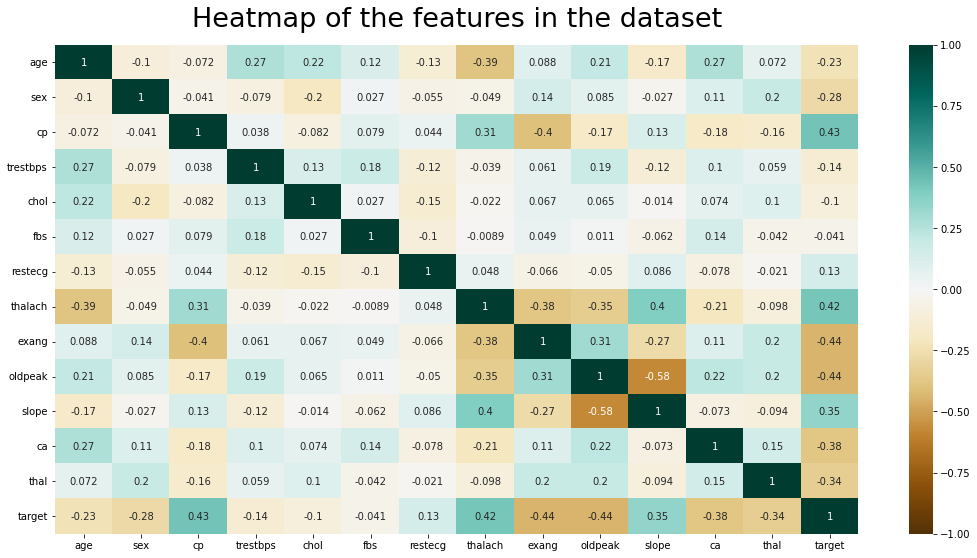

In [ ]:
plt.figure(figsize=(18, 9))
heatmap = sns.heatmap(original_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap of the features in the dataset', fontdict={'fontsize':27}, pad=18);

It is observed that most of the features are not highly corelated since the values are less than 0.5 for most of the features.

Let's observe the relation between the features using the pairplot:

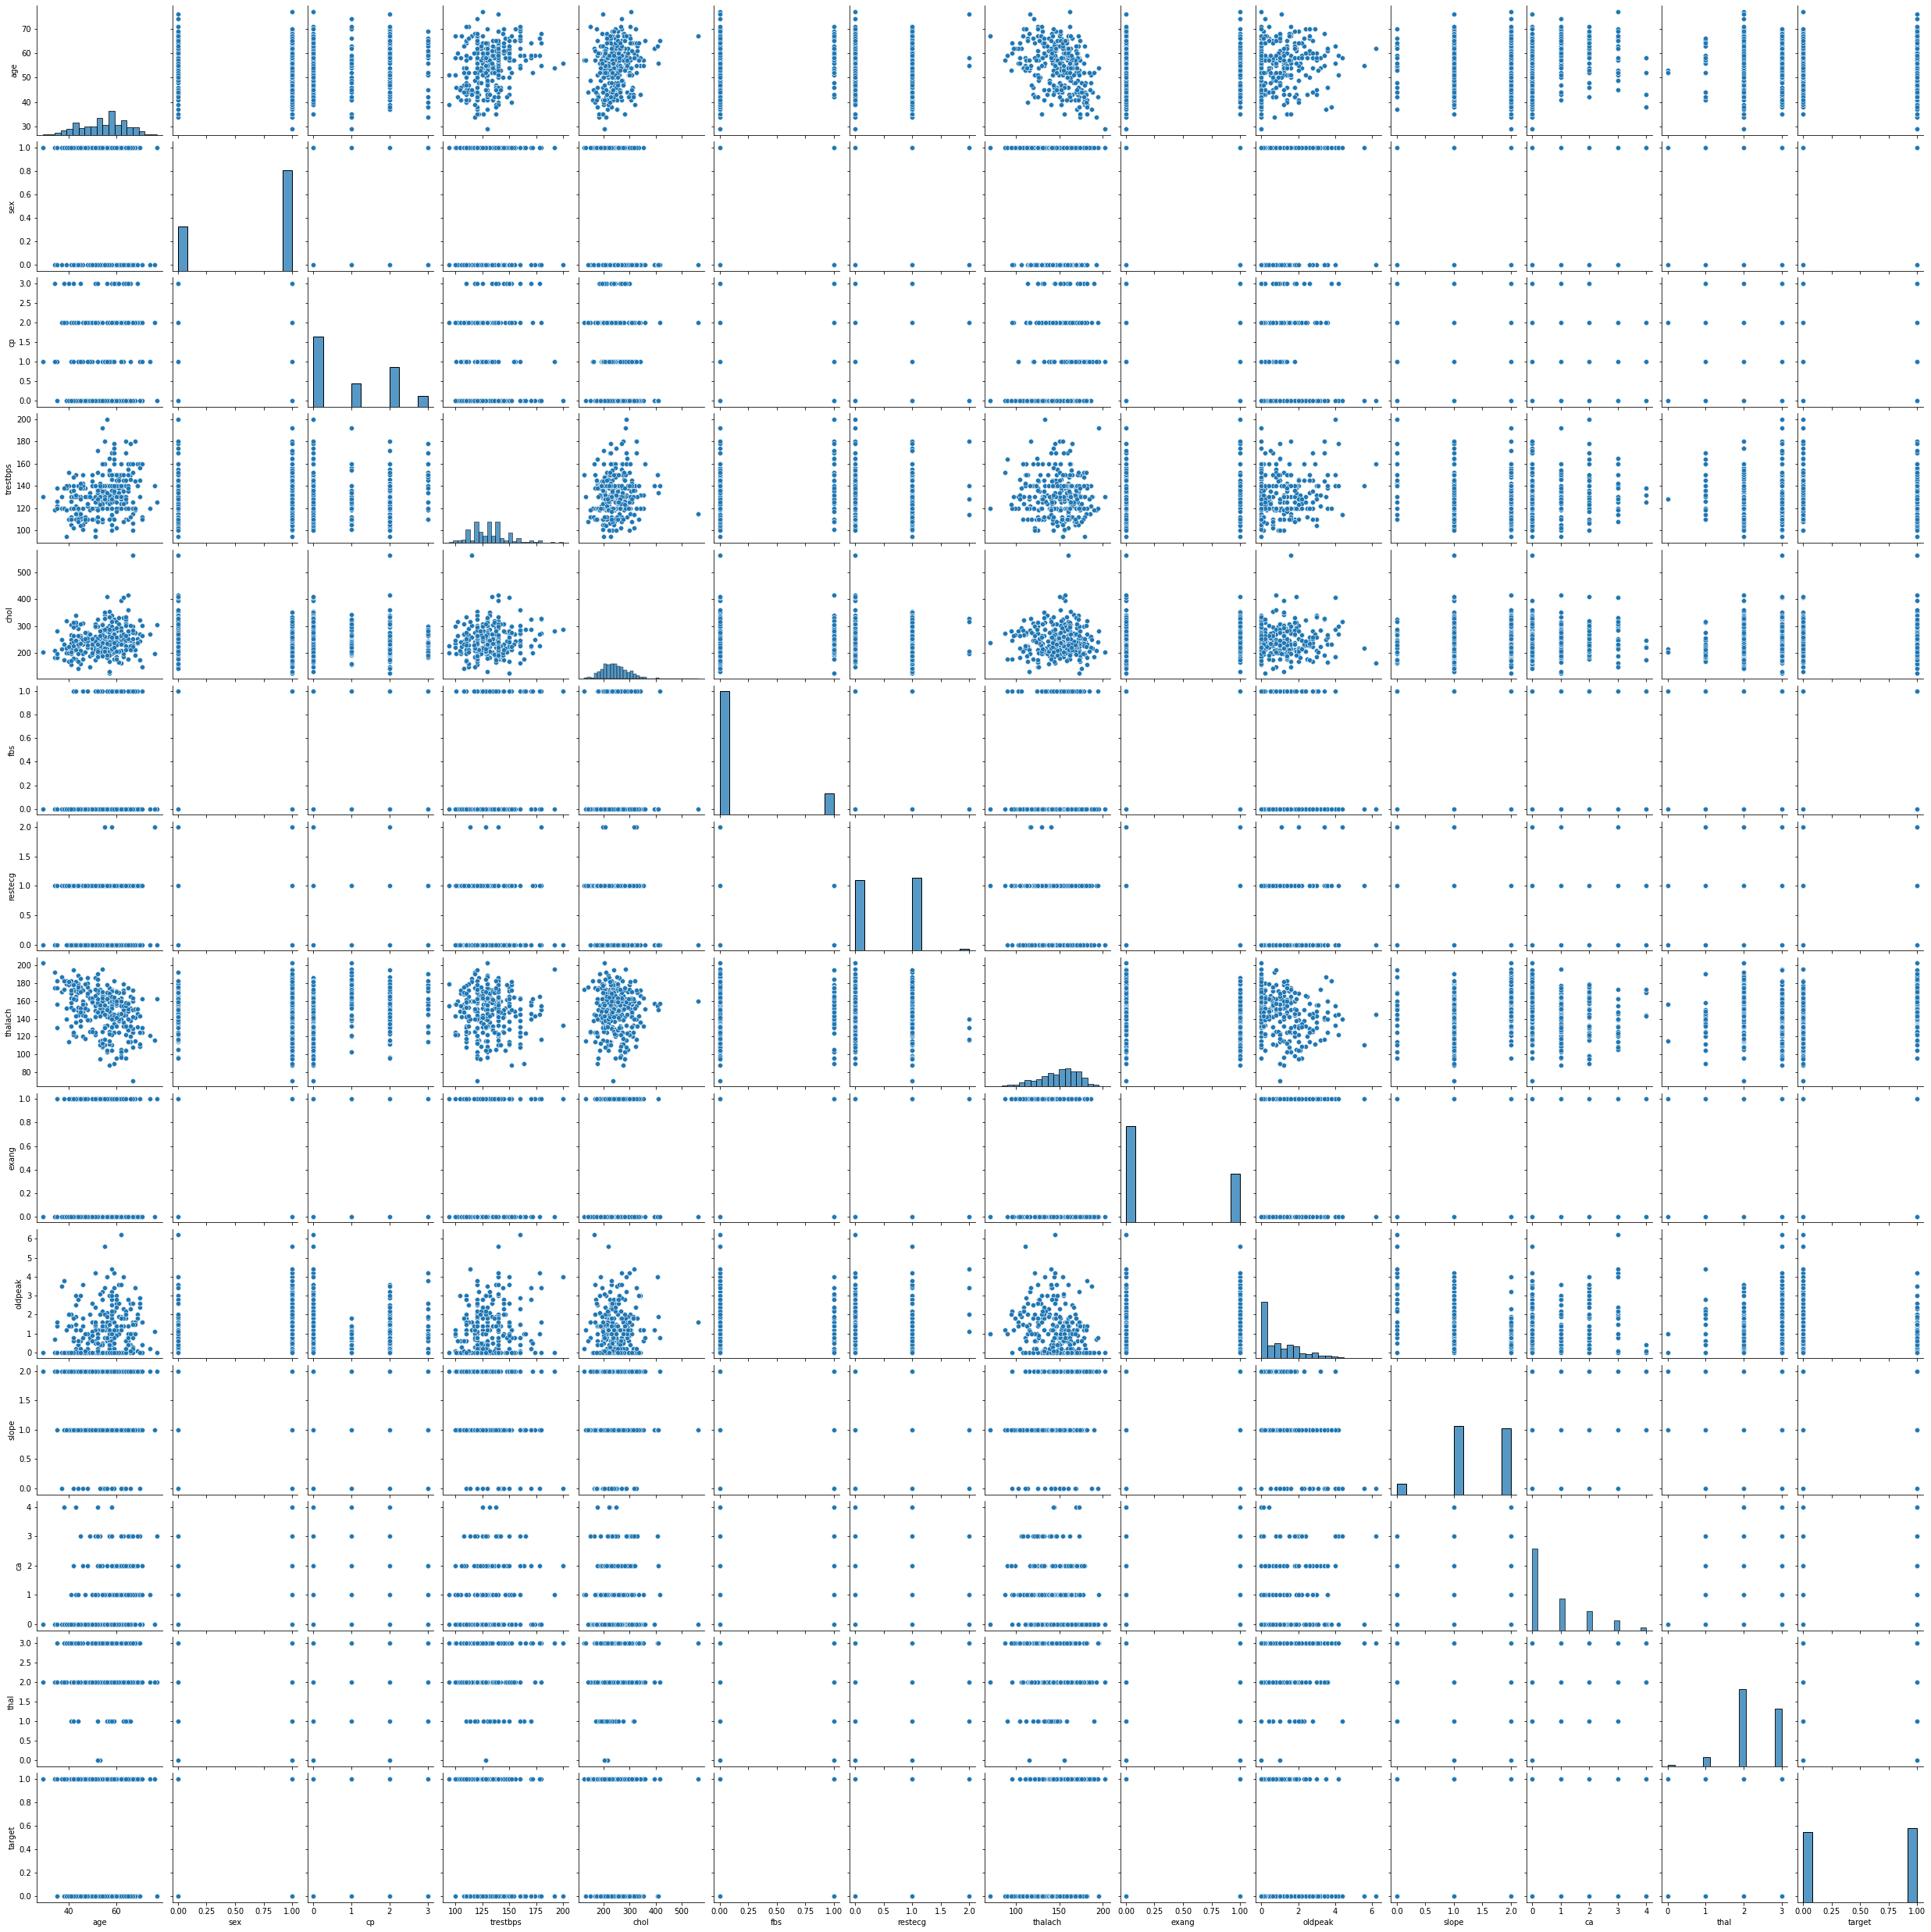

In [ ]:
sns.pairplot(original_data)

In [ ]:
df1=original_data[original_data["target"]==1]
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


Let's observe the distribution of the age groups 

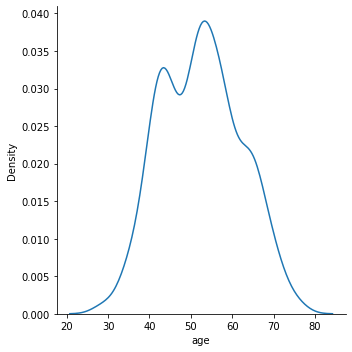

In [ ]:
sns.displot(df1, x="age", kind="kde")

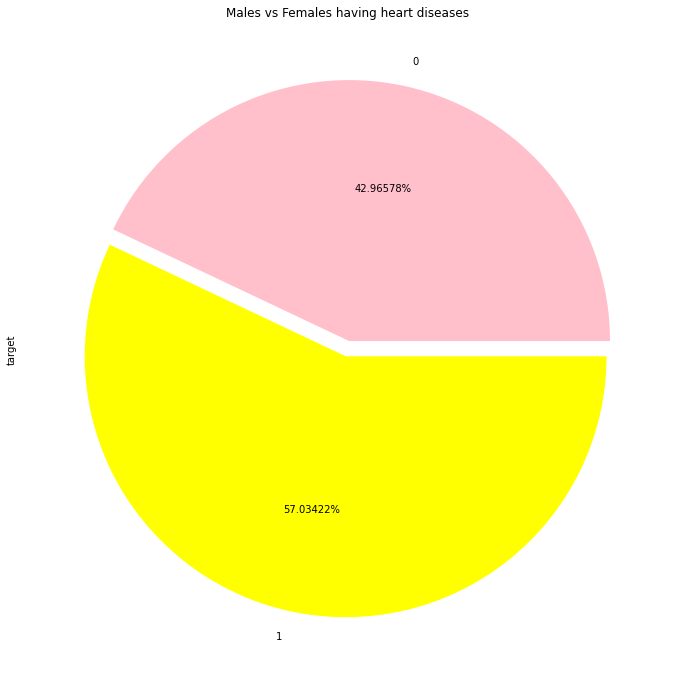

In [ ]:
plt.title("Males vs Females having heart diseases")
profit_pie = df1.groupby('sex')['target'].sum()
colour = ['pink', 'yellow']
profit_pie.plot(kind='pie',startangle=0,figsize=(15,12),autopct='%1.5f%%',explode=[0.03]*2, colors = colour)
labels = "Females","Males"

Let's first validate if there are values which are missing in the dataset:

In [ ]:
original_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

It is observed that none of the columns have any missing values.

Let's check for any outliers in the dataset and remove it:

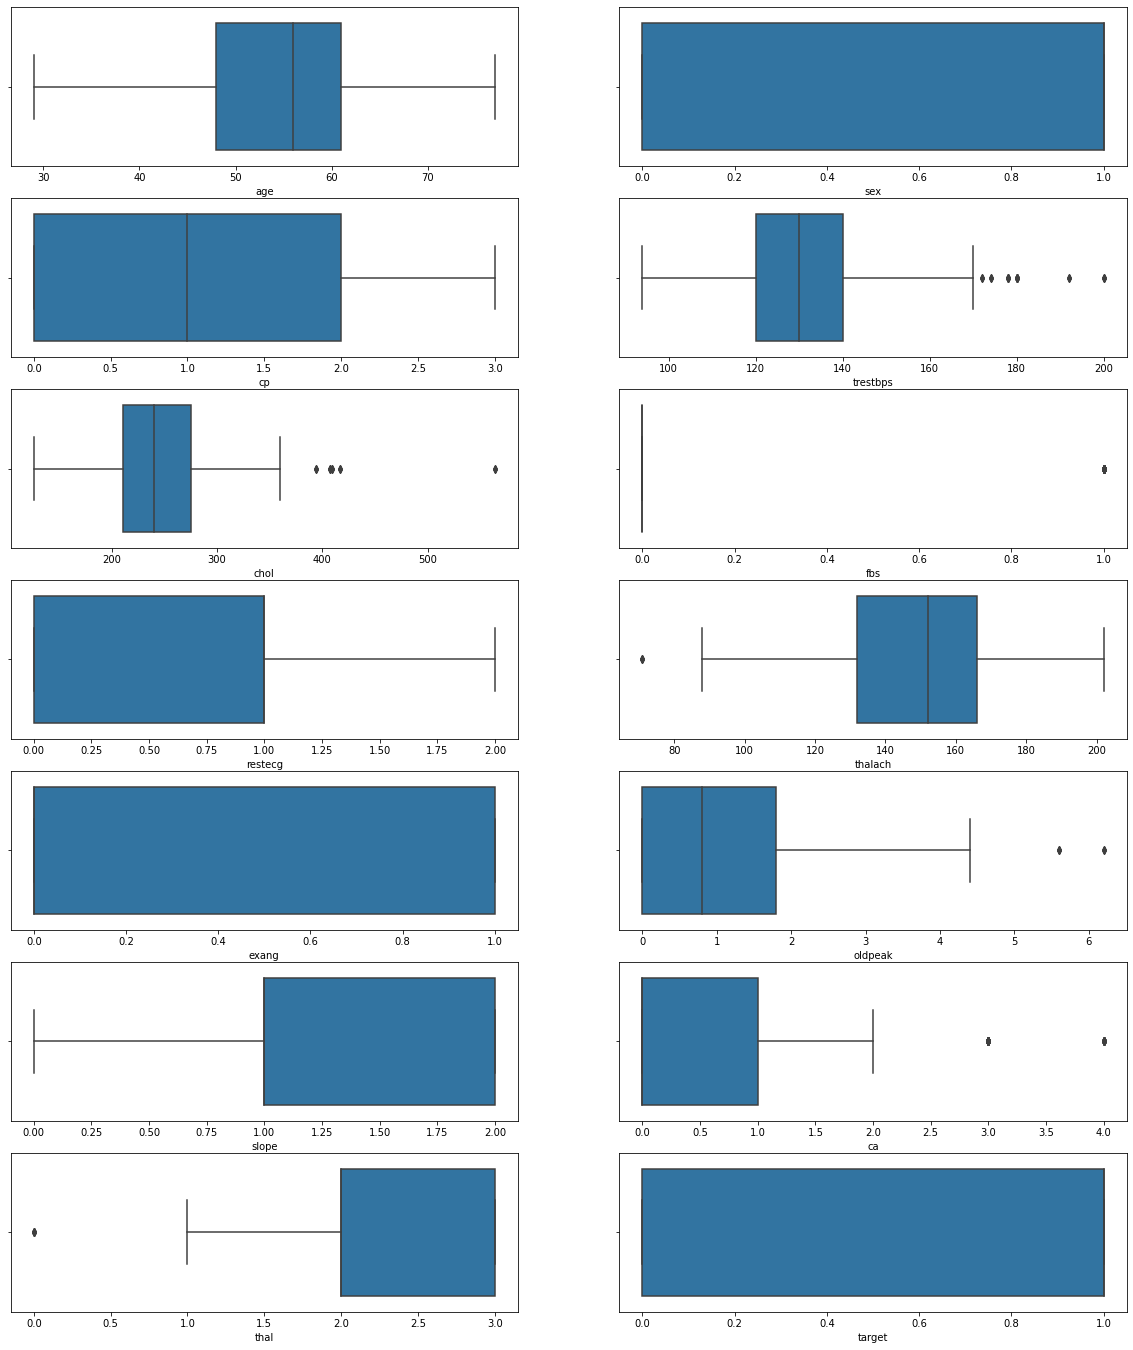

In [ ]:
#Boxplot for finding the outliers:
plt.figure(figsize = (20,24))
j=1
for i in original_data.columns:
  plt.subplot(7,2,j)
  sns.boxplot(x=original_data[i])
  j=j+1

Removing the outliers using the interquantile process:

In [ ]:
cols = original_data.columns
Q1 = original_data[cols].quantile(0.10)
Q3 = original_data[cols].quantile(0.75)
InterQuatertileRange = Q3 - Q1

cleaned_data = original_data[~((original_data[cols] < (Q1 - 1.5 * InterQuatertileRange)) |(original_data[cols] > (Q3 + 1.5 * InterQuatertileRange))).any(axis=1)]

Let's observe the cleaned data for any outliers:

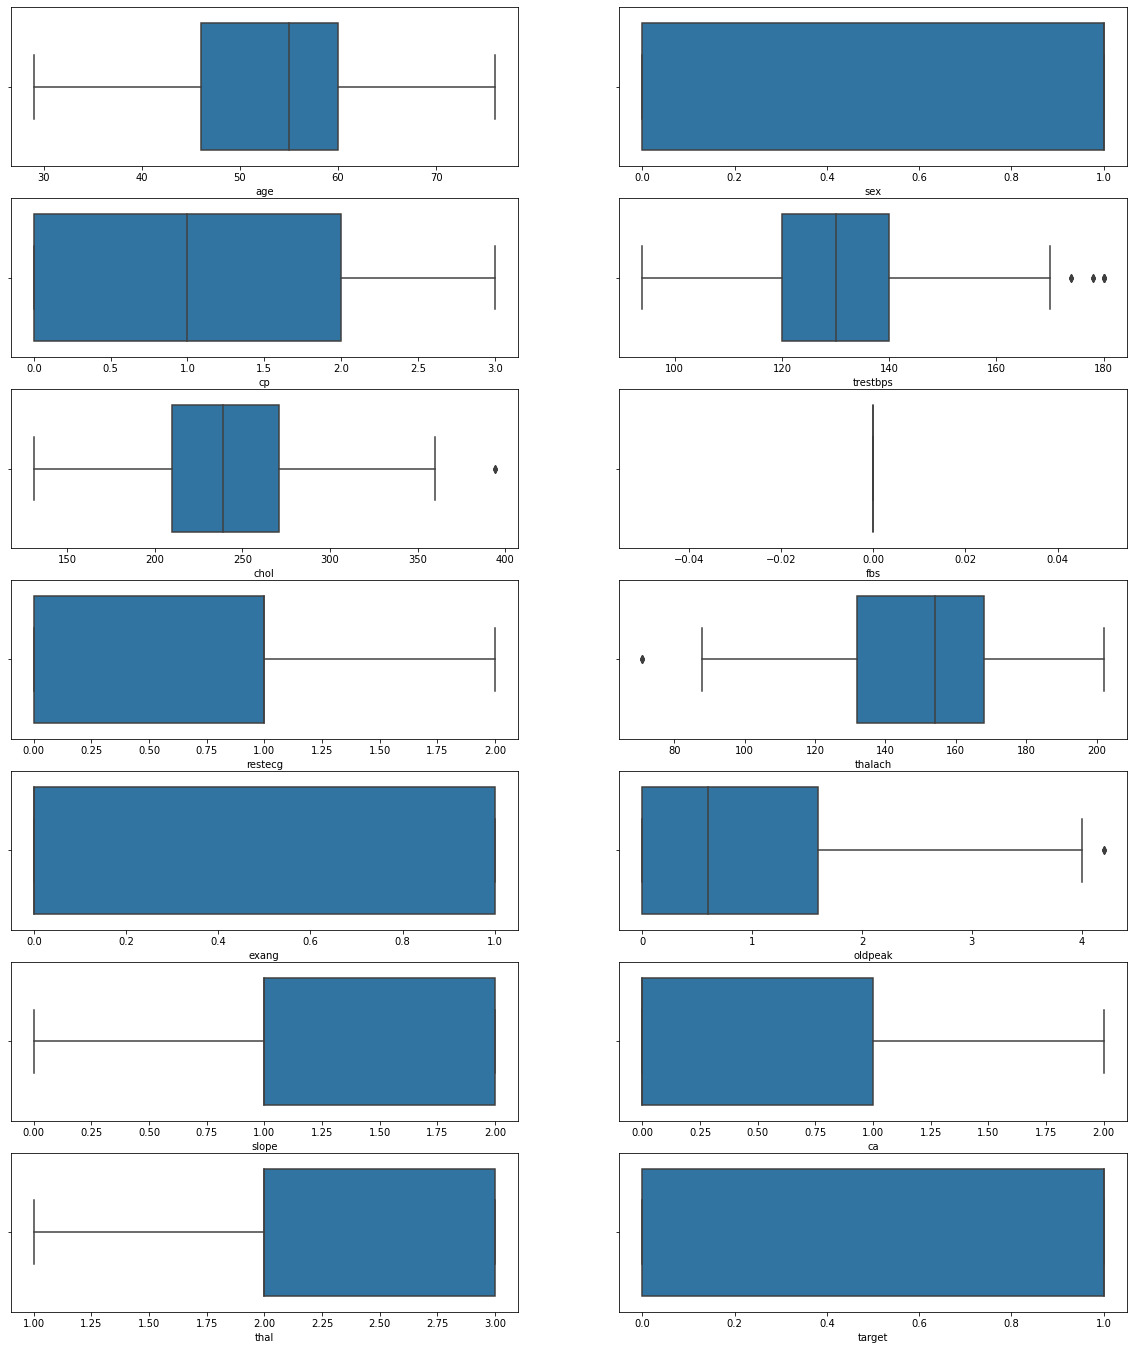

In [ ]:

#Boxplot for finding the outliers:
plt.figure(figsize = (20,24))
j=1
for i in cleaned_data.columns:
  plt.subplot(7,2,j)
  sns.boxplot(x=cleaned_data[i])
  j=j+1

In [ ]:
cleaned_data.shape

(789, 14)

The next step will be creating the Machine learning model that carry out the tasks of learning from the feature columns and help in predicting the cardioivascular disease.

Firstly, we seperate the data into features and target variables.

X is the feature variable containing all the columns.

y is the target variable containing the corresponding target value for the features.

In [ ]:
# Splitting the data into features and target 
X = original_data.drop('target', axis = 1)
y = original_data.target

Further, train set and test set are obtained by dividing the data



*   80% of the data is utilized for training the model.

*   20% of the data is utilized for testing the model.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [ ]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,54.392683,0.679268,0.931707,131.834146,247.732927,0.146341,0.526829,148.906098,0.341463,1.066463,1.392683,0.734146,2.323171
std,9.015355,0.467043,1.020053,18.169042,53.008126,0.353664,0.523454,22.881170,0.474490,1.151061,0.610806,1.010352,0.616580
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,276.250000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000



As we can see that the minimum values and the maximum values for the fearures are very different in range we will scale them so that model learns better representations from the data.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 460 to 105
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       820 non-null    int64  
 1   sex       820 non-null    int64  
 2   cp        820 non-null    int64  
 3   trestbps  820 non-null    int64  
 4   chol      820 non-null    int64  
 5   fbs       820 non-null    int64  
 6   restecg   820 non-null    int64  
 7   thalach   820 non-null    int64  
 8   exang     820 non-null    int64  
 9   oldpeak   820 non-null    float64
 10  slope     820 non-null    int64  
 11  ca        820 non-null    int64  
 12  thal      820 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 89.7 KB


In [ ]:
scaler = MinMaxScaler()
## Normalisation on train data
scaled_train_data = scaler.fit_transform(X_train)
normalized_train_data = pd.DataFrame(scaled_train_data, columns = X_train.columns)
normalized_train_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.833333,1.0,0.666667,0.433962,0.292237,0.0,0.0,0.572519,0.0,0.322581,0.5,0.75,1.000000
1,0.250000,1.0,0.666667,0.169811,0.283105,0.0,0.5,0.824427,0.0,0.000000,1.0,0.00,0.666667
2,0.375000,1.0,0.666667,0.415094,0.299087,0.0,0.0,0.648855,0.0,0.000000,1.0,0.00,0.666667
3,0.416667,0.0,0.000000,0.339623,0.326484,0.0,0.5,0.702290,0.0,0.000000,1.0,0.00,0.666667
4,0.187500,1.0,0.666667,0.415094,0.111872,0.0,0.5,0.778626,0.0,0.000000,1.0,1.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.541667,1.0,0.333333,0.339623,0.310502,0.0,0.5,0.641221,0.0,0.000000,1.0,0.00,0.666667
816,0.750000,1.0,0.000000,0.386792,0.292237,0.0,0.0,0.427481,0.0,0.451613,0.5,0.25,1.000000
817,0.000000,1.0,0.333333,0.339623,0.178082,0.0,0.0,1.000000,0.0,0.000000,1.0,0.00,0.666667
818,0.520833,1.0,0.666667,0.245283,0.301370,0.0,0.0,0.580153,0.0,0.064516,0.5,0.00,1.000000


In [ ]:
## Normalisation on test data
scaled_test_data = scaler.transform(X_test)
normalized_test_data = pd.DataFrame(scaled_test_data, columns = X_test.columns)
normalized_test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
1,0.458333,1.0,1.000000,0.292453,0.198630,0.0,0.0,0.412214,1.0,0.225806,1.0,0.25,0.666667
2,0.750000,1.0,1.000000,0.415094,0.356164,1.0,0.0,0.786260,0.0,0.225806,0.5,0.25,0.666667
3,0.875000,0.0,0.333333,0.622642,0.401826,0.0,0.5,0.694656,0.0,0.064516,1.0,0.50,0.666667
4,0.520833,0.0,0.333333,0.358491,0.369863,1.0,0.0,0.671756,1.0,0.000000,1.0,0.25,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.541667,0.0,0.333333,0.358491,0.493151,0.0,0.5,0.725191,0.0,0.193548,1.0,0.00,0.666667
201,0.583333,1.0,0.000000,0.669811,0.372146,1.0,0.0,0.404580,0.0,0.161290,0.5,0.75,1.000000
202,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
203,0.395833,1.0,0.000000,0.283019,0.337900,0.0,0.0,0.725191,0.0,0.080645,0.5,0.00,1.000000


Checking for the missing values in the normalized train data:

In [ ]:
normalized_train_data.describe().iloc[0,:].value_counts()

820.0    13
Name: count, dtype: int64

Checking for the missing values in the normalized test data:

In [ ]:
normalized_test_data.describe().iloc[0,:].value_counts()

205.0    13
Name: count, dtype: int64

In [ ]:
print(normalized_train_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


The training data does not have any missing values

In [ ]:
print(normalized_test_data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


The test data does not have any missing values.

#Building the neural network without the genetic algorithm and then Genetic Algorithm based Neural Network:

NN:

In [ ]:
from keras import Sequential
Model_of_Neural_Network = Sequential()
Model_of_Neural_Network.add(Dense(activation = "relu", input_dim = 13, 
                     units = 512, kernel_initializer = "uniform"))
Model_of_Neural_Network.add(Dense(activation = "relu", units = 256, 
                     kernel_initializer = "uniform"))
Model_of_Neural_Network.add(Dense(activation = "relu", units = 128, 
                     kernel_initializer = "uniform"))
Model_of_Neural_Network.add(Dense(activation = "relu", units = 64, 
                     kernel_initializer = "uniform"))
Model_of_Neural_Network.add(Dense(activation = "sigmoid", units = 10, 
                     kernel_initializer = "uniform"))
Model_of_Neural_Network.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
Model_of_Neural_Network.compile(optimizer = "adam" , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )
Model_of_Neural_Network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 180,309
Trainable params: 180,309
Non-trai

The developed model is now used on our Heart disease data:

In [ ]:
beginning_time=time.time()
Model_of_Neural_Network.fit(normalized_train_data.values, y_train.values  ,epochs = 50  )
final_time=time.time() - beginning_time

Epoch 1/50
26/26 [==============================] - 4s 9ms/step - loss: 0.6930 - accuracy: 0.5146
Epoch 2/50
26/26 [==============================] - 0s 6ms/step - loss: 0.6793 - accuracy: 0.6366
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.7841
Epoch 4/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.8195
Epoch 5/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5364 - accuracy: 0.8537
Epoch 6/50
26/26 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.8268
Epoch 7/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.8476
Epoch 8/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.8415
Epoch 9/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4810 - accuracy: 0.8256
Epoch 10/50
26/26 [==============================] - 0s 3ms/step - loss: 0.4545 - accuracy: 0.8512
Epoch 11/50
26/26 [

The accuracy of the model is calculated below:

In [ ]:
y_predict1 = Model_of_Neural_Network.predict(normalized_test_data)
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_predict1.round()))
print("The computational time is ",final_time," sec")

7/7 [==============================] - 0s 3ms/step
Test Accuracy: 0.92
The computational time is  10.98198390007019  sec


In [ ]:
print(classification_report(y_test,y_predict1.round()))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       101
           1       0.94      0.90      0.92       104

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [ ]:
# A utility function 
def misclassified_total(cm):
  sum = 0
  for i in range(0, cm.shape[0]):
    for j in range(0, cm.shape[1]):
      if i == j:
        continue
      else:
        sum = sum + cm[i][j]
  
  return sum

Create a confusion matrix:

In [ ]:
confusion_matrix_simple_NN = confusion_matrix(y_test, y_predict1.round())
confusion_matrix_simple_NN

array([[95,  6],
       [10, 94]])

Finding out the number of misclassified results:

In [ ]:
misclassified_NN = misclassified_total(confusion_matrix_simple_NN)
misclassified_NN

16

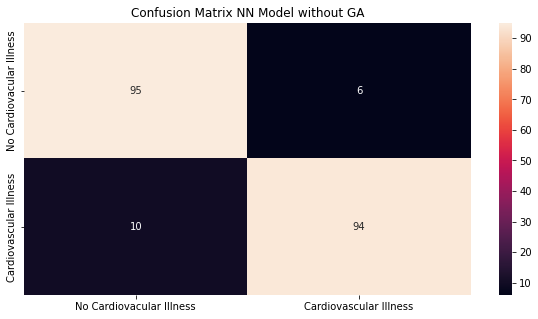

In [ ]:
## Classification Report
class_names = ['No Cardiovacular Illness',"Cardiovascular Illness"]

plt.figure(figsize= (10,5))
c1 = sns.heatmap(confusion_matrix_simple_NN, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
c1 = c1.set_title("Confusion Matrix NN Model without GA")

GA-NN:

The function performs the crossover for the given weights:

In [ ]:
#Reference from [7]
def function_crossover(Neural_Network_1, Neural_Network_2):
    
    #Weights which are being used:
    weights_of_first_NN = []
    weights_of_second_NN = []
    weights_of_child = []
    
    
    #Obtain the weights from the first network layer:
    layer1=0
    while(layer1<len(Neural_Network_1.layers)):
        weights_of_first_NN.append(Neural_Network_1.layers[layer1].get_weights()[0])
        layer1=layer1+1

    #Obtain the weights from the second network layer:
    layer2=0
    while(layer2<len(Neural_Network_2.layers)):
        weights_of_second_NN.append(Neural_Network_2.layers[layer2].get_weights()[0])
        layer2=layer2+1

    

    #Going through weights and doing the crossover:
    i=0
    while(i<len(weights_of_first_NN)):
      split = random.randint(0, np.shape(weights_of_first_NN[i])[1]-1)
      j=split
      
      while(j< np.shape(weights_of_first_NN[i])[1]-1):
        weights_of_first_NN[i][:, j] = weights_of_second_NN[i][:, j]
        j=j+1
      
      weights_of_child.append(weights_of_first_NN[i])
      i=i+1

    #Mutation is added to the weights:
    mutation(weights_of_child)

    #Neural Network Model is created using the weights obtained above:
    child = Neural_Network_Model(weights_of_child)
    return child


The function that performs the mutation:

In [ ]:
#Reference from [7]
def mutation(weights_of_child):
    
    selection = random.randint(0, len(weights_of_child)-1)
    mut = random.uniform(0, 1)
        
    while (mut>=0.8):
      #print("hELLO MUTATION")
      weights_of_child[selection] *= random.randint(3, 9)
      break

    while (mut<0.8):
      #print("No mutation")
      break


Class to generate the neural network for the genetic algorithm to work:

In [ ]:
#Reference from [7]
class Neural_Network_Model(Sequential):
    
    def __init__(self, weights_of_child=None):
        super().__init__()
        
        #No weights are present initially so providing the input to generate the NN model:
        while (weights_of_child == None):
          
            layer1 = Dense(512, input_shape=(13,), activation='relu', kernel_initializer = "uniform")            
            layer2 = Dense(256, activation='relu', kernel_initializer = "uniform")
            layer3 = Dense(128, activation='relu', kernel_initializer = "uniform")
            layer4 = Dense(64, activation='relu', kernel_initializer = "uniform")
            layer5 = Dense(10, activation='relu', kernel_initializer = "uniform")
            layer9 = Dense(1, activation='sigmoid', kernel_initializer = "uniform")


            
            # Adding these layers to the model:
            self.add(layer1)
            self.add(layer2)
            self.add(layer3)
            self.add(layer4)
            self.add(layer5)
            self.add(layer9)

            break        

        #Generating the model when the weights are given:
        while (weights_of_child!=None):
            self.add(
                Dense(
                    512,
                    input_shape=(13,),
                    activation='relu',
                    weights=[weights_of_child[0], np.zeros(512)], kernel_initializer = "uniform")
                )
            self.add(
                Dense(
                 256,
                 activation='relu',
                 weights=[weights_of_child[1], np.zeros(256)], kernel_initializer = "uniform")
            )
            
            self.add(
                Dense(
                 128,
                 activation='relu',
                 weights=[weights_of_child[2], np.zeros(128)], kernel_initializer = "uniform")
            )
            self.add(
                Dense(
                 64,
                 activation='relu',
                 weights=[weights_of_child[3], np.zeros(64)], kernel_initializer = "uniform")
            )
            self.add(
                Dense(
                 10,
                 activation='relu',
                 weights=[weights_of_child[4], np.zeros(10)], kernel_initializer = "uniform")
            )
            self.add(
                Dense(
                 1,
                 activation='sigmoid',
                 weights=[weights_of_child[5], np.zeros(1)], kernel_initializer = "uniform")
            )

            break    

    #Here forward propogation takes place:
    def forward_propagation(self, pca_trained_data_df, y_train):
        
        y_temp = self.predict(pca_trained_data_df.values)        
        self.fitness = accuracy_score(y_train, y_temp.round())
        return(self.fitness)
       
    #Here the back propogation of the NN takes place:
    def compilation_back_propogation(self, epochs):
        global computational_time
        self.compile(
                      optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy']
                      )
        start_time=time.time()
        self.fit(normalized_train_data.values, y_train.values, epochs=epochs)
        computational_time=time.time() - start_time


The main part where the weights and other functions are called for execution:

In [ ]:
#Reference from [7]
NeuralNetwork = []
Neural_Network_Pool = []

gen = 0
Initial_Population = 20

#Adding neural network to the list:
k=0
while (k<Initial_Population):
  NeuralNetwork.append(Neural_Network_Model())
  k=k+1

Maximum_Fitness = 0

excellent_weights = []

#While loop which looks for the perfect weight:
while Maximum_Fitness < .70:
  
  gen += 1
  print('gen: ', gen)
  
  #Finding the fitness of the neural  networks present in the list
  j=0
  while (j<len(NeuralNetwork)):
      NeuralNetwork[j].forward_propagation(normalized_train_data, y_train)  
      Neural_Network_Pool.append(NeuralNetwork[j])
      #length_NeuralNetwork=length_NeuralNetwork-1
      j=j+1

  
  
  NeuralNetwork.clear()

  #The neural network pool is sorted according to the fitness 
  Neural_Network_Pool = sorted(Neural_Network_Pool, key=lambda x: x.fitness)


  #Here the maximum value for the fitness is obtained:
  i=0
  while(i<len(Neural_Network_Pool)):
      if Neural_Network_Pool[i].fitness > Maximum_Fitness:
          Maximum_Fitness = Neural_Network_Pool[i].fitness
          print('Max Fitness: ', Maximum_Fitness)

          excellent_weights = []

          for layer in Neural_Network_Pool[i].layers:
              excellent_weights.append(layer.get_weights()[0])
          print(excellent_weights)
      i=i+1

  
  #From the top 6 weights, selecting two partners:
  top = 0
  while(top<6):
    partner=0
    while(partner<2):
      crossover_result = function_crossover(Neural_Network_Pool[top], random.choice(Neural_Network_Pool))
      NeuralNetwork.append(crossover_result)
      #print(partner)
      partner=partner+1
    top=top+1

    

gen:  1
26/26 [==============================] - 0s 1ms/step
Max Fitness:  0.2597560975609756
[array([[-0.00869327,  0.02206261, -0.0400064 , ...,  0.02004235,
         0.00995916,  0.03659942],
       [ 0.02087014, -0.00875788, -0.0147314 , ..., -0.03607925,
         0.04575083, -0.00399368],
       [-0.02224067, -0.03339158,  0.02949155, ..., -0.04328811,
         0.00872233,  0.00023503],
       ...,
       [-0.0334542 , -0.03086034, -0.00969893, ..., -0.01571163,
        -0.03152876, -0.03505332],
       [-0.03123646, -0.01069524, -0.00168326, ..., -0.0112417 ,
         0.03497024,  0.02897101],
       [ 0.0353634 ,  0.02686906,  0.03152415, ...,  0.0393808 ,
         0.02430325, -0.00210867]], dtype=float32), array([[-0.03597047,  0.0440633 , -0.01501132, ..., -0.0294965 ,
         0.03069884,  0.01380756],
       [-0.03641143,  0.04024661, -0.03152472, ..., -0.02834132,
         0.03809224,  0.00928146],
       [-0.00956403,  0.04788763, -0.03962801, ...,  0.02336151,
         0.

Let's create the neural network model from the top weigths which are obtained:

In [ ]:

nn = Neural_Network_Model(excellent_weights)
nn.summary()
nn.compilation_back_propogation(50)


y_predict = nn.predict(normalized_test_data.values)

print('Test Accuracy: %.2f' % accuracy_score(y_test, y_predict.round()))
print("The computational time is ",computational_time," sec")
print(classification_report(y_test,y_predict.round()))

Model: "neural__network__model_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_366 (Dense)           (None, 512)               7168      
                                                                 
 dense_367 (Dense)           (None, 256)               131328    
                                                                 
 dense_368 (Dense)           (None, 128)               32896     
                                                                 
 dense_369 (Dense)           (None, 64)                8256      
                                                                 
 dense_370 (Dense)           (None, 10)                650       
                                                                 
 dense_371 (Dense)           (None, 1)                 11        
                                                                 
Total params: 180,309
Trainable params: 1

Finding the confusion matrix for the GA-NN model:

In [ ]:
confusion_matrix_GA_NN = confusion_matrix(y_test, y_predict.round())
confusion_matrix_GA_NN

array([[101,   0],
       [  5,  99]])

Calculating the number of misclassification:

In [ ]:
misclassified_GA_NN = misclassified_total(confusion_matrix_GA_NN)
misclassified_GA_NN

5

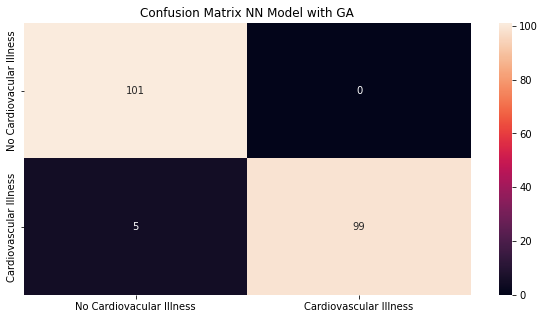

In [ ]:
## Classification Report
class_names = ['No Cardiovacular Illness',"Cardiovascular Illness"]

plt.figure(figsize= (10,5))
c2 = sns.heatmap(confusion_matrix_GA_NN, annot=True, fmt="d",  xticklabels=class_names, yticklabels=class_names)
c2 = c2.set_title("Confusion Matrix NN Model with GA")

References:


1.  https://pandas.pydata.org/docs/reference/general_functions.html
2.  https://seaborn.pydata.org/generated/seaborn.barplot.html
3.  https://matplotlib.org/stable/api/figure_api.html
4.  https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/
5.  https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6
6.  https://towardsdatascience.com/introduction-to-genetic-algorithm-and-python-implementation-for-function-optimization-fd36bad58277
7.  https://medium.com/swlh/genetic-artificial-neural-networks-d6b85578ba99
8.  https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html
9.  https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0


